# Paquetes

In [130]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

import tensorflow as tf

# Visualizacion previa de datos

In [2]:
path = os.getcwd()

In [74]:
c_df = pd.read_csv(os.path.join(path, 'Datos', 'Data_Coyhaique.csv'), index_col = [0])
c_df = c_df.set_index(pd.to_datetime(c_df.index))

In [75]:
c_df.isna().sum()/len(c_df)*100

Presion        0.264085
Temperatura    0.310544
HR             0.308099
RapViento      0.408353
O3             8.514280
CO             8.560739
PM25           1.978189
PM10           1.672535
SO2            2.616393
DoY            0.000000
DoW            0.000000
dtype: float64

In [76]:
c_df = c_df.fillna(value = c_df.mean())

In [77]:
c_df_mean = c_df.resample('D',kind = 'timestamp').mean()

In [78]:
c_df_mean

,Presion,Temperatura,HR,RapViento,O3,CO,PM25,PM10,SO2,DoY,DoW
2018-01-01,969.583333,9.612501,67.875000,4.754167,11.375849,0.796953,11.583333,16.000000,2.342500,1.0,1.0
2018-01-02,964.333333,12.633333,67.291667,4.462500,11.375849,0.796953,8.875000,12.666667,2.283333,2.0,2.0
2018-01-03,956.333333,11.683333,64.875000,4.008333,11.375849,0.796953,11.750000,17.041667,2.405000,3.0,3.0
2018-01-04,956.958333,8.708333,69.166667,3.712500,11.375849,0.796953,15.449413,20.952188,2.277917,4.0,4.0
2018-01-05,970.916667,10.137500,60.666667,5.525000,11.375849,0.796953,9.833333,17.125000,1.572500,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,981.298417,3.674328,58.290054,4.231699,12.083333,0.773333,37.083333,38.250000,1.594583,239.0,6.0
2022-08-28,983.387333,4.749944,61.044546,1.321621,10.208333,1.049583,59.291667,60.541667,1.615417,240.0,7.0
2022-08-29,973.471458,4.198099,59.810979,0.878979,5.083333,1.662083,100.125000,104.375000,2.050417,241.0,1.0
2022-08-30,972.757625,7.101256,68.694246,1.392455,8.250000,0.639167,27.416667,29.791667,1.762917,242.0,2.0


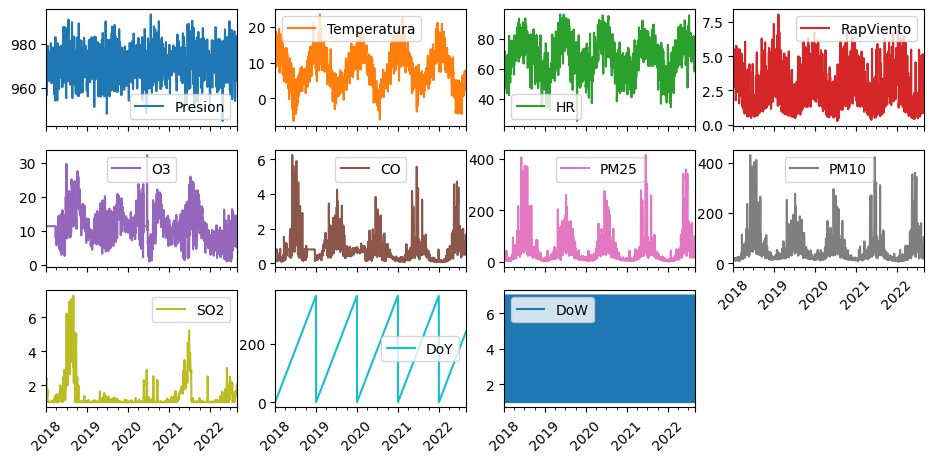

In [81]:
c_df_mean.plot(subplots = True, layout = (4,4), figsize = (7*(1+np.sqrt(5))/2,7), rot=45);

# Separación de datos

In [124]:
df_predictores = c_df_mean
df_predictores

,Presion,Temperatura,HR,RapViento,O3,CO,PM25,PM10,SO2,DoY,DoW
2018-01-01,969.583333,9.612501,67.875000,4.754167,11.375849,0.796953,11.583333,16.000000,2.342500,1.0,1.0
2018-01-02,964.333333,12.633333,67.291667,4.462500,11.375849,0.796953,8.875000,12.666667,2.283333,2.0,2.0
2018-01-03,956.333333,11.683333,64.875000,4.008333,11.375849,0.796953,11.750000,17.041667,2.405000,3.0,3.0
2018-01-04,956.958333,8.708333,69.166667,3.712500,11.375849,0.796953,15.449413,20.952188,2.277917,4.0,4.0
2018-01-05,970.916667,10.137500,60.666667,5.525000,11.375849,0.796953,9.833333,17.125000,1.572500,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,981.298417,3.674328,58.290054,4.231699,12.083333,0.773333,37.083333,38.250000,1.594583,239.0,6.0
2022-08-28,983.387333,4.749944,61.044546,1.321621,10.208333,1.049583,59.291667,60.541667,1.615417,240.0,7.0
2022-08-29,973.471458,4.198099,59.810979,0.878979,5.083333,1.662083,100.125000,104.375000,2.050417,241.0,1.0
2022-08-30,972.757625,7.101256,68.694246,1.392455,8.250000,0.639167,27.416667,29.791667,1.762917,242.0,2.0


In [ ]:
df_target = c_df_mean['PM25']
df_target = df_target.shift(-1)

In [ ]:
df_target.drop(df_target.index[-1], inplace = True)
df_predictores.drop(c_df_mean.index[-1], inplace = True)

In [107]:
df_target

2018-01-01      8.875000
2018-01-02     11.750000
2018-01-03     15.449413
2018-01-04      9.833333
2018-01-05      9.916667
                 ...    
2022-08-26     37.083333
2022-08-27     59.291667
2022-08-28    100.125000
2022-08-29     27.416667
2022-08-30     29.958333
Freq: D, Name: PM25, Length: 1703, dtype: float64

In [119]:
df_ml_predictores = df_predictores.loc['2018':'2021']
df_ml_target = df_target.loc['2018':'2021']

In [120]:
df_2022_predictores = df_predictores.loc['2022-01-01':'2022-08-30']
df_2022_target = df_target.loc['2022-01-01':'2022-08-30']

## Entrenamiento y Validación

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_predictores, df_ml_target, test_size = 0.30, random_state = 42)

# Feed Forward Neural Network

## 1.- Arquitectura

In [131]:
model_ffnn = tf.keras.models.Sequential()

model_ffnn.add(tf.keras.layers.Dense(160, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(320, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(640, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(320, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(160, activation = tf.keras.activations.relu))
model_ffnn.add(tf.keras.layers.Dense(80, activation = tf.keras.activations.relu))

model_ffnn.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

model_ffnn.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error'])

input_shape = X_train.shape
model_ffnn.build(input_shape)

model_ffnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1022, 160)               1920      
                                                                 
 dense_1 (Dense)             (1022, 320)               51520     
                                                                 
 dense_2 (Dense)             (1022, 640)               205440    
                                                                 
 dense_3 (Dense)             (1022, 320)               205120    
                                                                 
 dense_4 (Dense)             (1022, 160)               51360     
                                                                 
 dense_5 (Dense)             (1022, 80)                12880     
                                                                 
 dense_6 (Dense)             (1022, 1)                 8

2022-09-21 18:20:46.592344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-21 18:20:46.592861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-21 18:20:46.592991: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-21 18:20:46.593079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-21 18:20:46.593159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

## 2.- Entrenamiento

In [137]:
model_ffnn.fit(X_train, y_train, epochs = 5, batch_size = 100)

Epoch 1/5
11/11 [==============================] - 0s 5ms/step - loss: 1034.6599 - mean_absolute_error: 16.8526 - mean_squared_error: 1034.6599
Epoch 2/5
11/11 [==============================] - 0s 5ms/step - loss: 1009.8449 - mean_absolute_error: 18.7091 - mean_squared_error: 1009.8449
Epoch 3/5
11/11 [==============================] - 0s 5ms/step - loss: 966.4360 - mean_absolute_error: 16.7634 - mean_squared_error: 966.4360
Epoch 4/5
11/11 [==============================] - 0s 5ms/step - loss: 964.0419 - mean_absolute_error: 16.8331 - mean_squared_error: 964.0419
Epoch 5/5
11/11 [==============================] - 0s 4ms/step - loss: 954.3985 - mean_absolute_error: 17.1335 - mean_squared_error: 954.3985


In [143]:
model_ffnn.fit(X_train, y_train, epochs = 10, batch_size = 300)

Epoch 1/10
4/4 [==============================] - 0s 8ms/step - loss: 853.2235 - mean_absolute_error: 16.4927 - mean_squared_error: 853.2235
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 841.0135 - mean_absolute_error: 16.0296 - mean_squared_error: 841.0135
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 845.5329 - mean_absolute_error: 15.9389 - mean_squared_error: 845.5329
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 839.3203 - mean_absolute_error: 16.1004 - mean_squared_error: 839.3203
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 853.2571 - mean_absolute_error: 16.3451 - mean_squared_error: 853.2571
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 832.7991 - mean_absolute_error: 15.9505 - mean_squared_error: 832.7991
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 832.6912 - mean_absolute_error: 15.8742 - mean_squared_error: 832.6912
Epoch 8/10
4/

## 3.- Evaluación

In [144]:
loss, mae, mse = model_ffnn.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 1000.0240 - mean_absolute_error: 16.4084 - mean_squared_error: 1000.0240


## 4.- Predicción

In [145]:
pred_2022_FFNN = model_ffnn.predict(df_2022_predictores)

8/8 [==============================] - 0s 2ms/step


# Long-Short Term Memory

## 0.- Preprocesamiento LSTM

In [146]:
def rshp_features_lstm(features, n_steps):
  ini_batch = features.shape[0]
  n_features = features.shape[1]
  array_lstm = np.zeros((ini_batch, n_steps, n_features)) 
  for i in range(n_features):
    for j in range(n_steps):
      array_lstm[:,j,i] = np.roll(features.iloc[:,i],-j)

  array_lstm = np.delete(array_lstm, range(n_steps -1 ), axis = 0)
  return array_lstm

In [159]:
#ini_batch = df_ml_predictores.shape[0]
#n_features = df_ml_predictores.shape[1]
n_steps = 5

new_features_n = rshp_features_lstm(df_ml_predictores,n_steps)

new_target_n = df_ml_target.drop(df_ml_target.index[0:n_steps-1])

X_lstm_2022 = rshp_features_lstm(df_2022_predictores, n_steps)

In [160]:
X_train_lstm, X_test_lstm, Y_train_lstm, Y_test_lstm = train_test_split(new_features_n, new_target_n.values, test_size = 0.30, random_state = 42)

## 1.- Arquitectura

In [151]:
model_LSTM1 = tf.keras.models.Sequential()

model_LSTM1.add(tf.keras.layers.LSTM(50,input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2]), activation = tf.keras.activations.relu))


model_LSTM1.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

model_LSTM1.compile(optimizer = 'adam',
                   loss = 'mean_squared_error',
                   metrics = ['mean_absolute_error','mean_squared_error'])

#input_shape = X_train_lstm.shape[1],X_train_lstm.shape[2])
#model_LSTM1.build((2, 9))

model_LSTM1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,451
Trainable params: 12,451
Non-trainable params: 0
_________________________________________________________________


## 2.- Entrenamiento

In [152]:
model_LSTM1.fit(X_train_lstm, Y_train_lstm, epochs = 5, batch_size = 30)

Epoch 1/5
35/35 [==============================] - 1s 3ms/step - loss: 7489.4873 - mean_absolute_error: 62.6499 - mean_squared_error: 7489.4873
Epoch 2/5
35/35 [==============================] - 0s 2ms/step - loss: 2193.0515 - mean_absolute_error: 28.5883 - mean_squared_error: 2193.0515
Epoch 3/5
35/35 [==============================] - 0s 2ms/step - loss: 1108.1112 - mean_absolute_error: 21.1663 - mean_squared_error: 1108.1111
Epoch 4/5
35/35 [==============================] - 0s 2ms/step - loss: 545.2724 - mean_absolute_error: 12.0328 - mean_squared_error: 545.2724
Epoch 5/5
35/35 [==============================] - 0s 2ms/step - loss: 352.4109 - mean_absolute_error: 10.9611 - mean_squared_error: 352.4109


## 3.- Evaluación

In [153]:
loss, mae, mse = model_LSTM1.evaluate(X_test_lstm,Y_test_lstm)

14/14 [==============================] - 0s 1ms/step - loss: 176.1623 - mean_absolute_error: 9.6311 - mean_squared_error: 176.1623


## 4.- Predicción

In [ ]:
pred_2022_LSTM = model_LSTM1.predict(X_lstm_p)